<a href="https://colab.research.google.com/github/js4410/Glassdoor-job-salary-predictor/blob/main/DecisionTreeRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [11]:
df = pd.read_csv('/content/salary_data_cleaned (2).csv')

In [12]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'math', 'engineering', 'data analysis', 'AI'],
      dtype='object')

In [14]:
df_model=df[['Rating','Location','Size','Type of ownership','Industry','Sector','Revenue','hourly','employer_provided','avg_salary',
       'same_state','age','python_yn','spark','aws','excel','Job Title','math', 'engineering', 'data analysis', 'AI']]

In [15]:
# Creating dummy data

df_dum = pd.get_dummies(df_model)

In [17]:
X=df_dum.drop('avg_salary', axis=1)
y=df_dum.avg_salary.values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [23]:
# Create Decision Tree Regressor object
clf = DecisionTreeRegressor()

# Train Decision Tree Regressor
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
Y_pred = clf.predict(X_test)

In [31]:
feature_cols = X.columns

Mean Squared Error: 1291.64


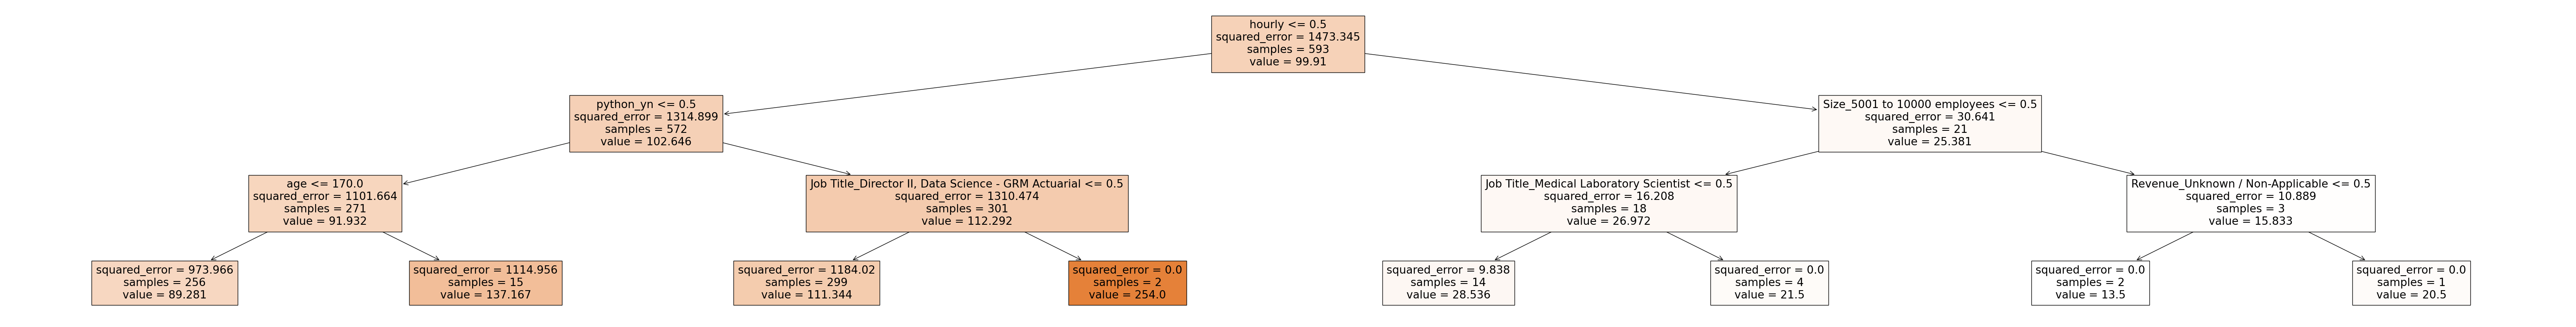

In [69]:
import pydotplus
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
plt.figure(figsize=(80,10))
plot_tree(tree_reg, filled=True, feature_names=X.columns)
plt.show()